In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
url1="https://raw.githubusercontent.com/ChitranjanUpadhayay/ML_Projects/main/Datasets/Fake%20News/True.csv"
true=pd.read_csv(url1)

In [3]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
url2="https://raw.githubusercontent.com/ChitranjanUpadhayay/ML_Projects/main/Datasets/Fake%20News/Fake.csv"
fake=pd.read_csv(url2)

In [5]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
true['label']=1
fake['label']=0

In [7]:
df=pd.concat([fake,true]).reset_index(drop=True)

In [8]:
df=df.sample(frac=1)

In [9]:
df=df.drop(['title','subject','date'],axis=1)
df.head()

,text,label
43592,ANKARA (Reuters) - Turkey on Thursday welcomed...,1
42522,"YAUCO, Puerto Rico (Reuters) - Hurricane Maria...",1
2956,Anyone with half a brain knows that foods like...,0
5018,A Fox host engaged in some seriously f*cked up...,0
42429,WELLINGTON (Reuters) - New Zealand s major par...,1


In [10]:
df.reset_index(inplace=True)

In [11]:
df.head()

,index,text,label
0,43592,ANKARA (Reuters) - Turkey on Thursday welcomed...,1
1,42522,"YAUCO, Puerto Rico (Reuters) - Hurricane Maria...",1
2,2956,Anyone with half a brain knows that foods like...,0
3,5018,A Fox host engaged in some seriously f*cked up...,0
4,42429,WELLINGTON (Reuters) - New Zealand s major par...,1


In [12]:
df.drop(columns=['index'],inplace=True)
df.head()

,text,label
0,ANKARA (Reuters) - Turkey on Thursday welcomed...,1
1,"YAUCO, Puerto Rico (Reuters) - Hurricane Maria...",1
2,Anyone with half a brain knows that foods like...,0
3,A Fox host engaged in some seriously f*cked up...,0
4,WELLINGTON (Reuters) - New Zealand s major par...,1


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

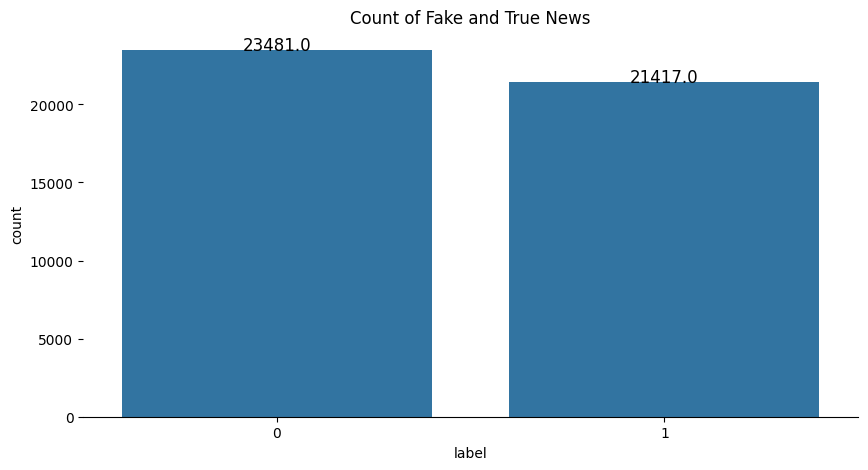

In [14]:
#creating a count plot for category column
fig = plt.figure(figsize=(10,5))



graph = sns.countplot(x="label", data=df)
plt.title("Count of Fake and True News")

#removing boundary
graph.spines["right"].set_visible(False)
graph.spines["top"].set_visible(False)
graph.spines["left"].set_visible(False)

#annoting bars with the counts
for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x()+p.get_width()/2., height + 0.2,height ,ha="center",fontsize=12)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44898 non-null  object
 1   label   44898 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 701.7+ KB


In [16]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [17]:
# Drop NA values
df = df.dropna()

# Missing data analysis again
df.isnull().sum()

text     0
label    0
dtype: int64

In [18]:
df.head()

,text,label
0,ANKARA (Reuters) - Turkey on Thursday welcomed...,1
1,"YAUCO, Puerto Rico (Reuters) - Hurricane Maria...",1
2,Anyone with half a brain knows that foods like...,0
3,A Fox host engaged in some seriously f*cked up...,0
4,WELLINGTON (Reuters) - New Zealand s major par...,1


In [19]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [20]:
#loading spacy library
nlp=spacy.load("en_core_web_sm")

#creating instance
lm=WordNetLemmatizer()

In [21]:
#creating list of stopwords containing stopwords from spacy and nltk

#stopwords of spacy
list1=nlp.Defaults.stop_words
print(len(list1))

#stopwords of NLTK
list2=stopwords.words('english')
print(len(list2))

#combining the stopword list
Stopwords=set((set(list1)|set(list2)))
print(len(Stopwords))

326
179
382


In [22]:
def clean_text(text):

    """
    It takes text as an input and clean it by applying several methods

    """

    string = ""

    #lower casing
    text=text.lower()

    #simplifying text
    text=re.sub(r"i'm","i am",text)
    text=re.sub(r"he's","he is",text)
    text=re.sub(r"she's","she is",text)
    text=re.sub(r"that's","that is",text)
    text=re.sub(r"what's","what is",text)
    text=re.sub(r"where's","where is",text)
    text=re.sub(r"\'ll"," will",text)
    text=re.sub(r"\'ve"," have",text)
    text=re.sub(r"\'re"," are",text)
    text=re.sub(r"\'d"," would",text)
    text=re.sub(r"won't","will not",text)
    text=re.sub(r"can't","cannot",text)

    #removing any special character
    text=re.sub(r"[-()\"#!@$%^&*{}?.,:]"," ",text)
    text=re.sub(r"https?://\S+|www\.\S+"," ",text)
    text=re.sub(r"\s+"," ",text)
    text=re.sub(r"\n"," ",text)
    text=re.sub('[^A-Za-z0-9]+',' ', text)

    for word in text.split():
        if word not in Stopwords:
            string+=lm.lemmatize(word)+" "

    return string

In [23]:
df["text"]=df["text"].apply(clean_text)

In [24]:
x=df['text']
y=df['label']

In [25]:
x

0        ankara reuters turkey thursday welcomed iraqi ...
1        yauco puerto rico reuters hurricane maria batt...
2        half brain know food like fried chicken waterm...
3        fox host engaged seriously f cked wishful thin...
4        wellington reuters new zealand major party lea...
                               ...                        
44893    donald trump want admit absolutely bombing pol...
44894    panama city reuters panama track hit record le...
44895    kiev reuters destruction ammunition depot year...
44896    long shadow wake recent mass tragedy la vega o...
44897    reuters u representative david jolly ended bid...
Name: text, Length: 44898, dtype: object

In [26]:
y

0        1
1        1
2        0
3        0
4        1
        ..
44893    0
44894    1
44895    1
44896    0
44897    1
Name: label, Length: 44898, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [29]:
#this pipe line will take the text and vectorise it , and then TF-IDF, then fitting the model

text_clf=Pipeline([("tfidf",TfidfVectorizer()),("clf",RandomForestClassifier())])
text_clf.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier())])

In [30]:
predictions=text_clf.predict(x_test)

In [31]:
from sklearn import metrics
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7750
           1       0.99      0.99      0.99      7067

    accuracy                           0.99     14817
   macro avg       0.99      0.99      0.99     14817
weighted avg       0.99      0.99      0.99     14817



In [32]:
print(metrics.accuracy_score(y_test,predictions))

0.9884592022676655


In [33]:
print(metrics.confusion_matrix(y_test,predictions))

[[7645  105]
 [  66 7001]]


In [34]:
def output_label(n):
  if n==0:
    return "It is a Fake News"
  elif n == 1:
    return "It is a Genuine News"

In [35]:
def manual_testing(news):
    # Create a DataFrame with the new news
    testing_news = {"text": [news]}
    new_def_test = pd.DataFrame(testing_news)

    # Clean the text
    new_def_test["text"] = new_def_test["text"].apply(clean_text)

    # Get the text from the DataFrame
    new_x_test = new_def_test["text"]

    # Transform the text using the pre-trained pipeline
    new_xv_test = text_clf["tfidf"].transform(new_x_test)

    # Predict using the pre-trained pipeline
    pred_rfc = text_clf["clf"].predict(new_xv_test)

    # Return the prediction
    return "\nRFC Prediction: {}".format(output_label(pred_rfc[0]))

In [42]:
print("Enter News : ")

Enter News : 


In [43]:
news=str(input())
manual_testing(news)

 Iran’s attack on Israel sparks race to avert a full-blown war  The huge salvo of missiles and drones launched from the arid plains of Iran toward Israel was the kind of direct conflict between the Middle East powers that the world had long feared would mark the explosion of a full-blown regional war.


'\nRFC Prediction: It is a Fake News'

In [44]:
pickle.dump(text_clf,open("model.pkl","wb"))